<a href="https://colab.research.google.com/github/USHIERU/Minkowski-Bouligand-dimension/blob/master/Minkowski_Bouligand_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import cv2
import copy
import numpy as np

class MinkowskiBouligandDimension:

    def __init__(self, img):
        self.img = copy.deepcopy(img)

    def test(self):
        print("OK")

    def is_diferent(self, crop_img):
        auxPix = np.array([255, 255, 255])

        for pixels in crop_img:
            for pixel in pixels:
                if((pixel != auxPix).all()):
                    return True
        return False


    def get_data(self, exponente, height, width, grid = False):
        img = copy.deepcopy(self.img)
        floatlWidth = width / exponente
        integerWidth = integerlHeight = int(floatlWidth)

        auxWidth = integerWidth
        auxHeight = integerlHeight

        posX = 0
        posY = 0

        boxesTouched = 0

        while (posY + auxHeight) <= height:
            posX = 0
            while((posX + auxWidth) <= width):
                crop_img = self.img[posY:posY + auxHeight, posX:posX + auxWidth]

                if self.is_diferent(crop_img) :
                    boxesTouched += 1
                    cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = -1)
                else:
                    if grid:
                        cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = 1)

                posX += auxWidth
            posY += auxHeight

        cv2.putText(img, "Total Squares: %s" % (exponente**2), (20, height - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(img, "Squares Touched: %s" % (boxesTouched), (20, height - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        return boxesTouched, img


    def paint_grid(self, exponente, height, width):
        img = copy.deepcopy(self.img)
        floatlWidth = width / exponente
        integerWidth = integerlHeight = int(floatlWidth)

        auxWidth = integerWidth
        auxHeight = integerlHeight

        posX = 0
        posY = 0

        while((posY + auxHeight) <= height):
            posX = 0
            while((posX + auxWidth) <= width):
                cv2.rectangle(img, (posX, posY), (posX + auxWidth, posY + auxHeight), (0, 0, 0), thickness = 1)
                posX += auxWidth
            posY += auxHeight

        return img

    def get_img(self):
        return self.img

Imagen Original
------------------------------


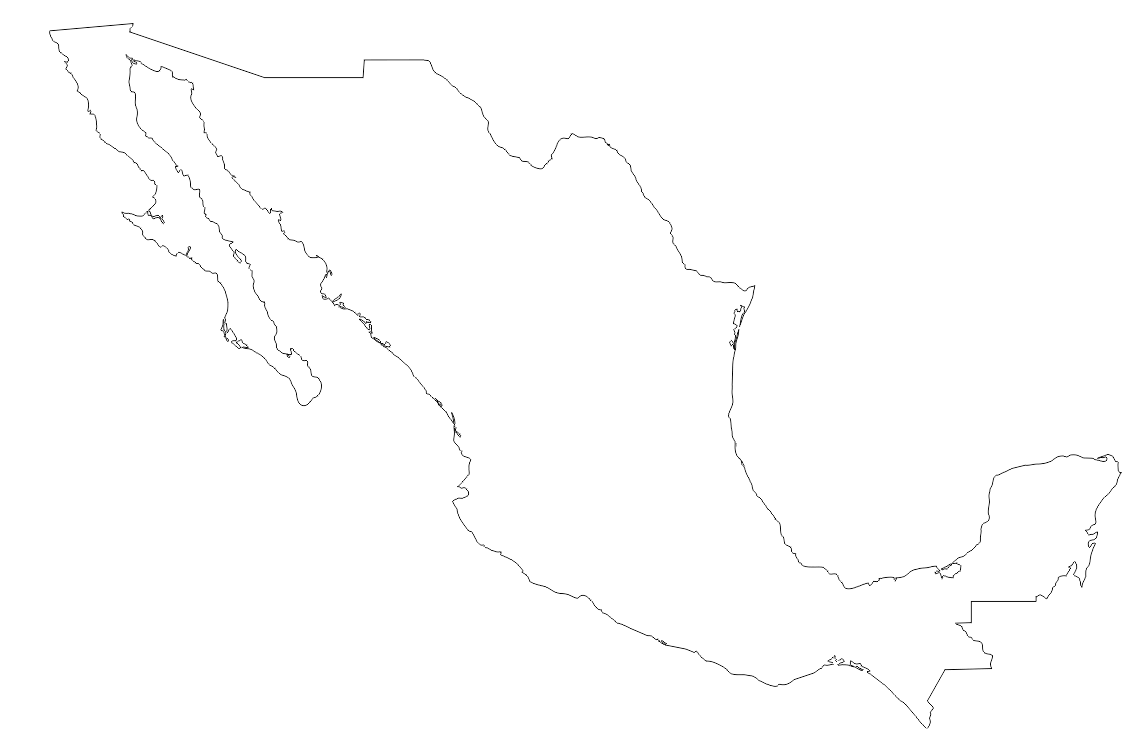

img: mexico 2
Total boxes: 4
Boxes Touched: 2
log(N): 0.6931471805599453
log(x): 1.3862943611198906
------------------------------


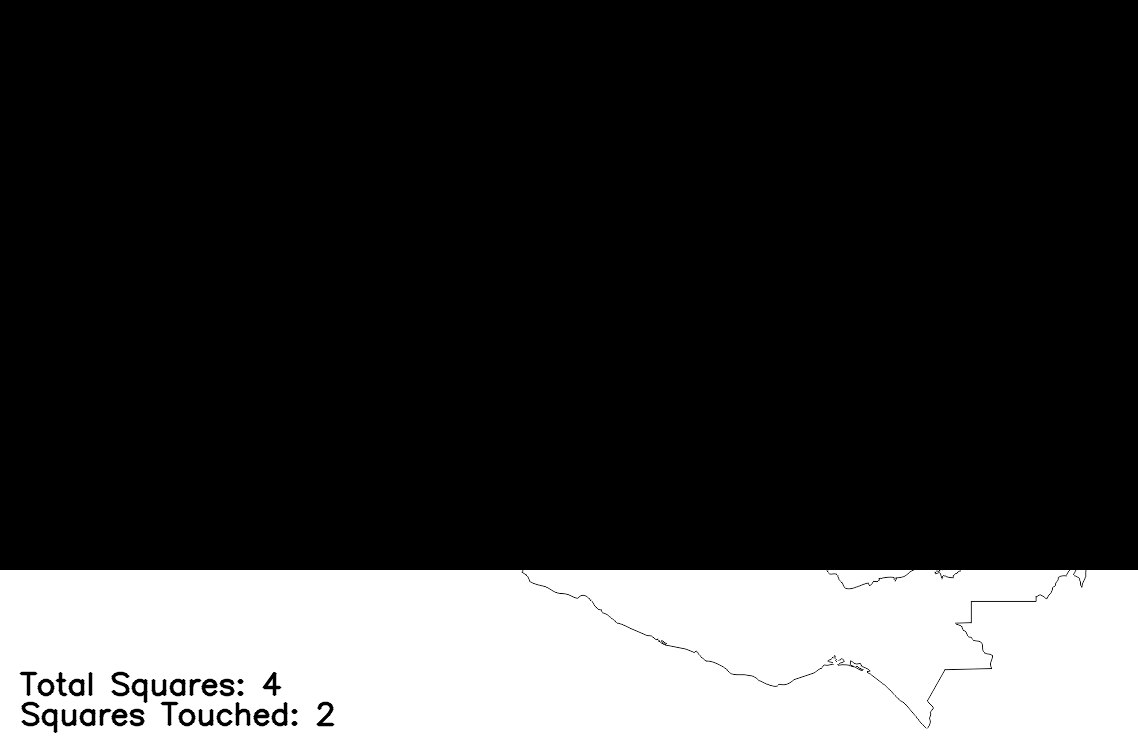

img: mexico 3
Total boxes: 16
Boxes Touched: 7
log(N): 1.9459101490553132
log(x): 2.772588722239781
------------------------------


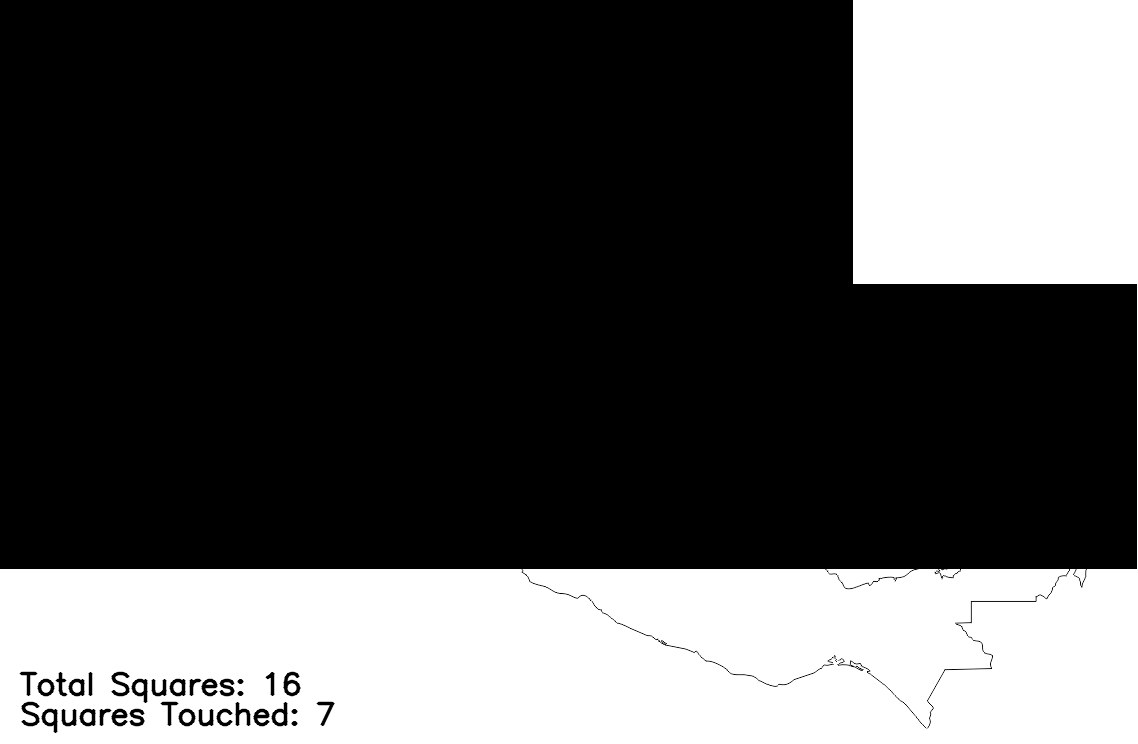

img: mexico 4
Total boxes: 64
Boxes Touched: 24
log(N): 3.1780538303479458
log(x): 4.1588830833596715
------------------------------


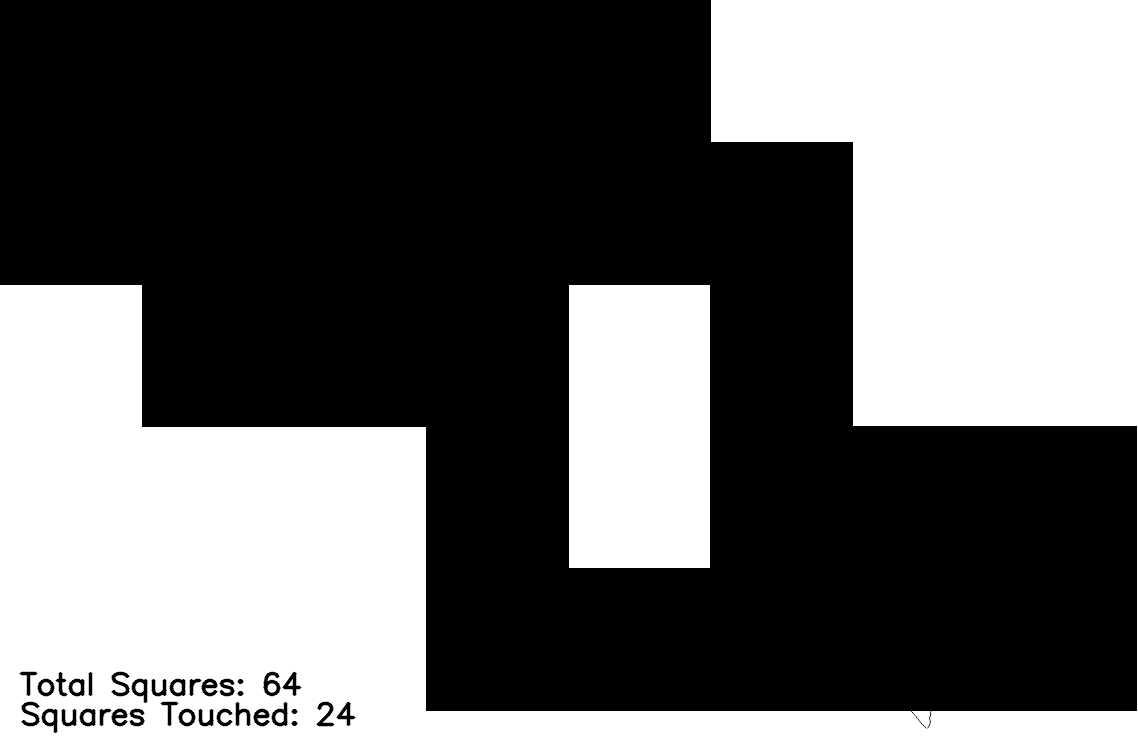

img: mexico 5
Total boxes: 256
Boxes Touched: 62
log(N): 4.127134385045092
log(x): 5.545177444479562
------------------------------


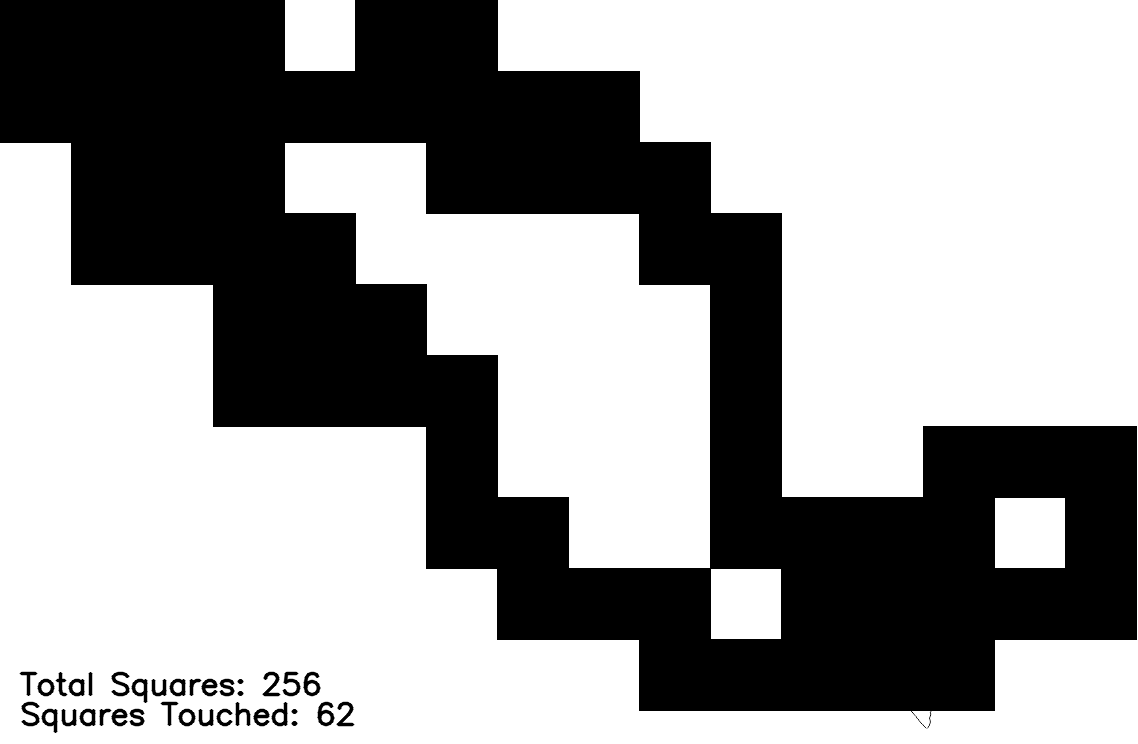

img: mexico 6
Total boxes: 1024
Boxes Touched: 147
log(N): 4.990432586778736
log(x): 6.931471805599453
------------------------------


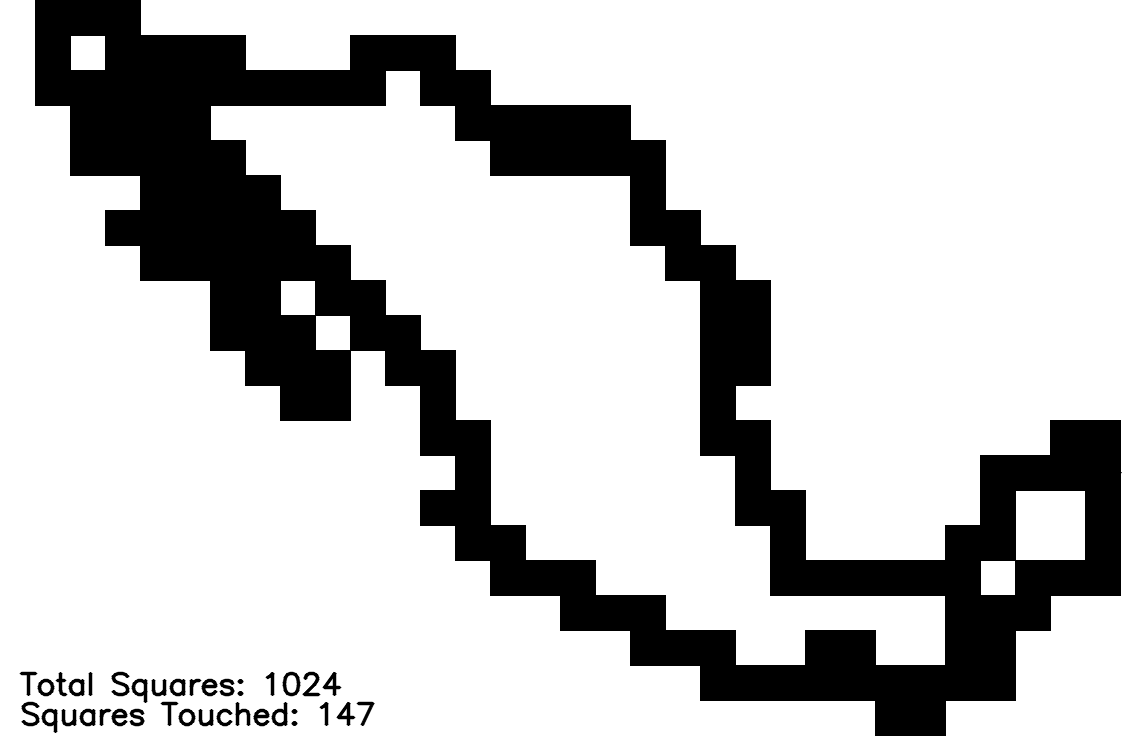

img: mexico 7
Total boxes: 4096
Boxes Touched: 337
log(N): 5.820082930352362
log(x): 8.317766166719343
------------------------------


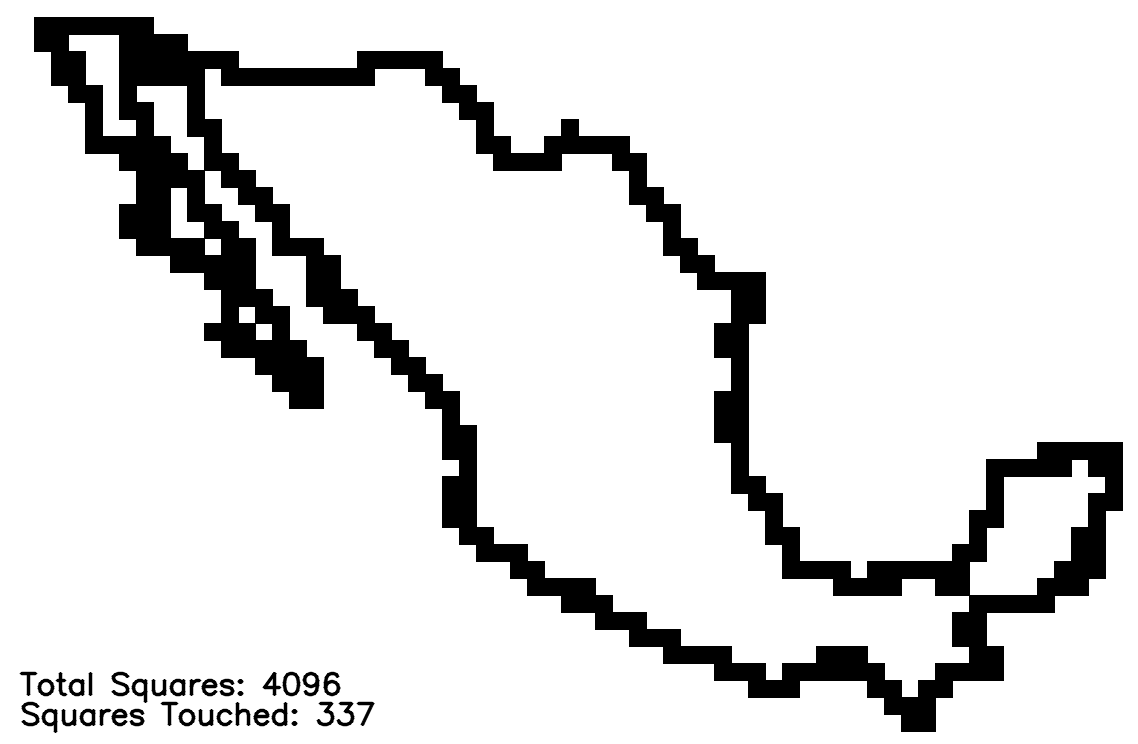

img: mexico 8
Total boxes: 16384
Boxes Touched: 765
log(N): 6.639875833826536
log(x): 9.704060527839234
------------------------------


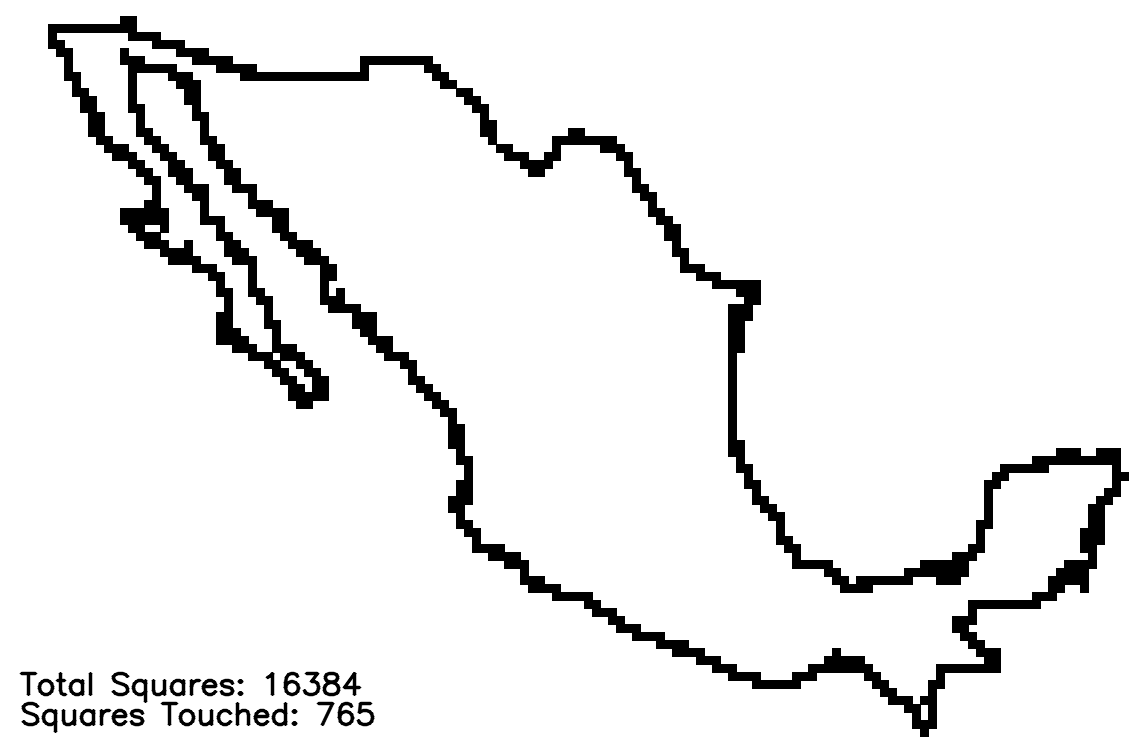

img: mexico 9
Total boxes: 65536
Boxes Touched: 1672
log(N): 7.421775793644647
log(x): 11.090354888959125
------------------------------


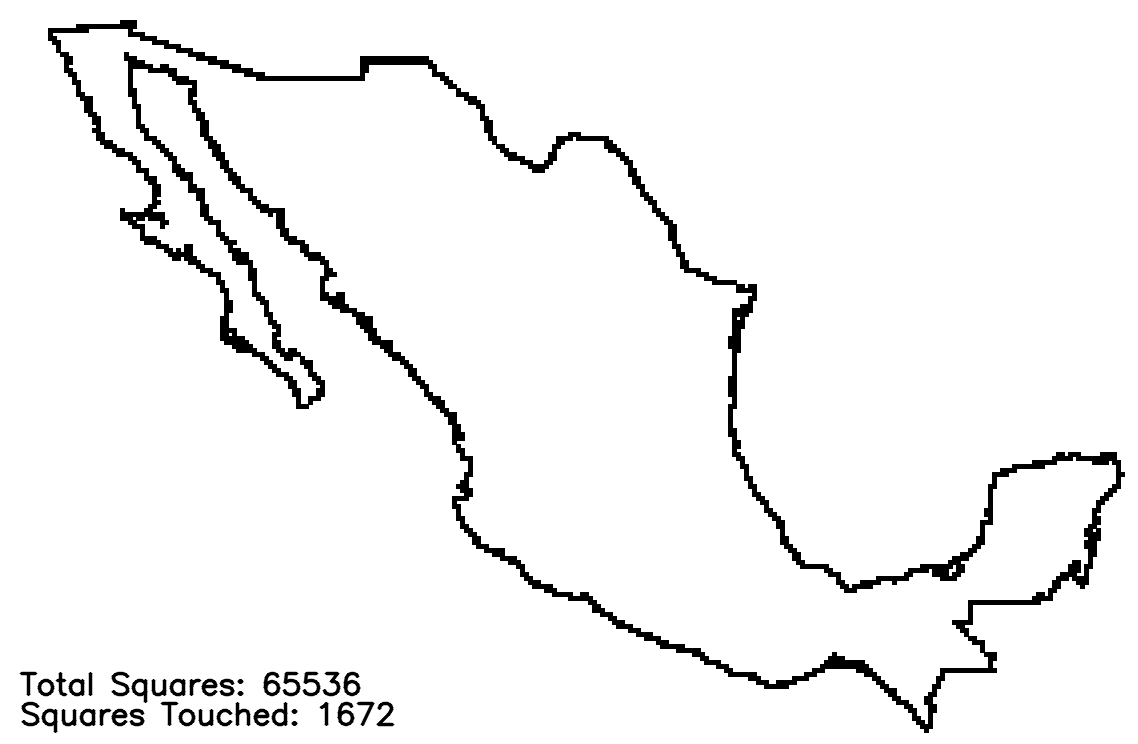

img: mexico 10
Total boxes: 262144
Boxes Touched: 3788
log(N): 8.239593454305968
log(x): 12.476649250079015
------------------------------


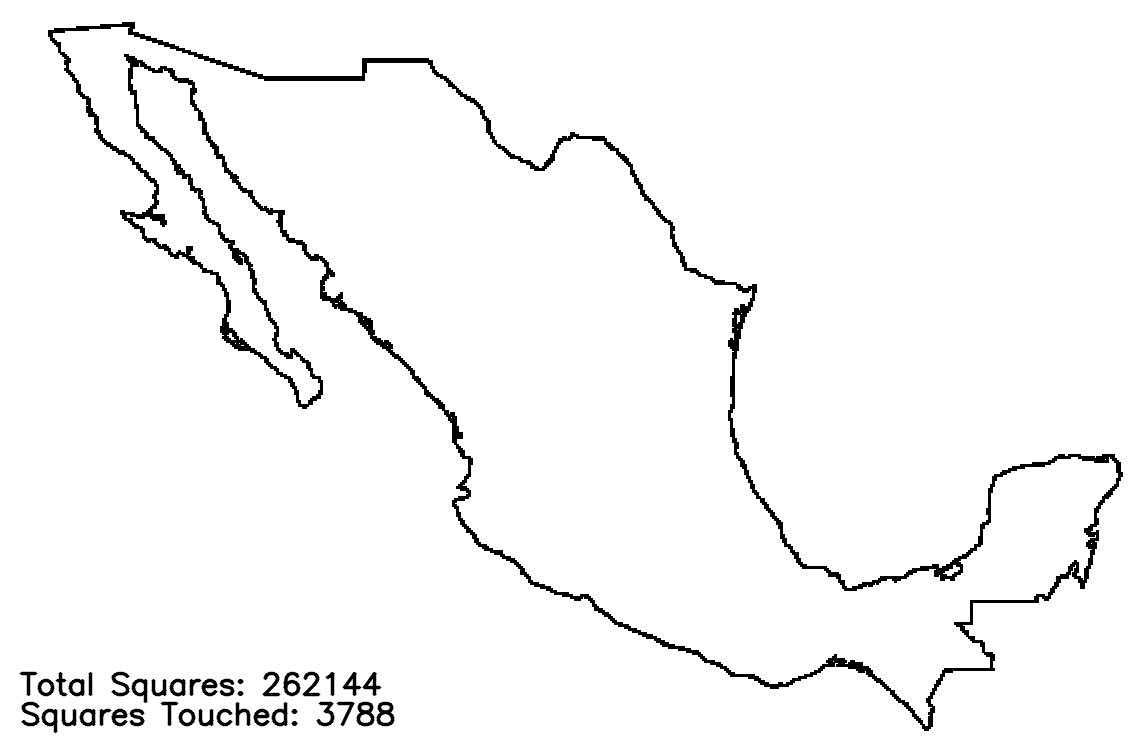

img: mexico 11
Total boxes: 1048576
Boxes Touched: 8999
log(N): 9.104868739033948
log(x): 13.862943611198906
------------------------------


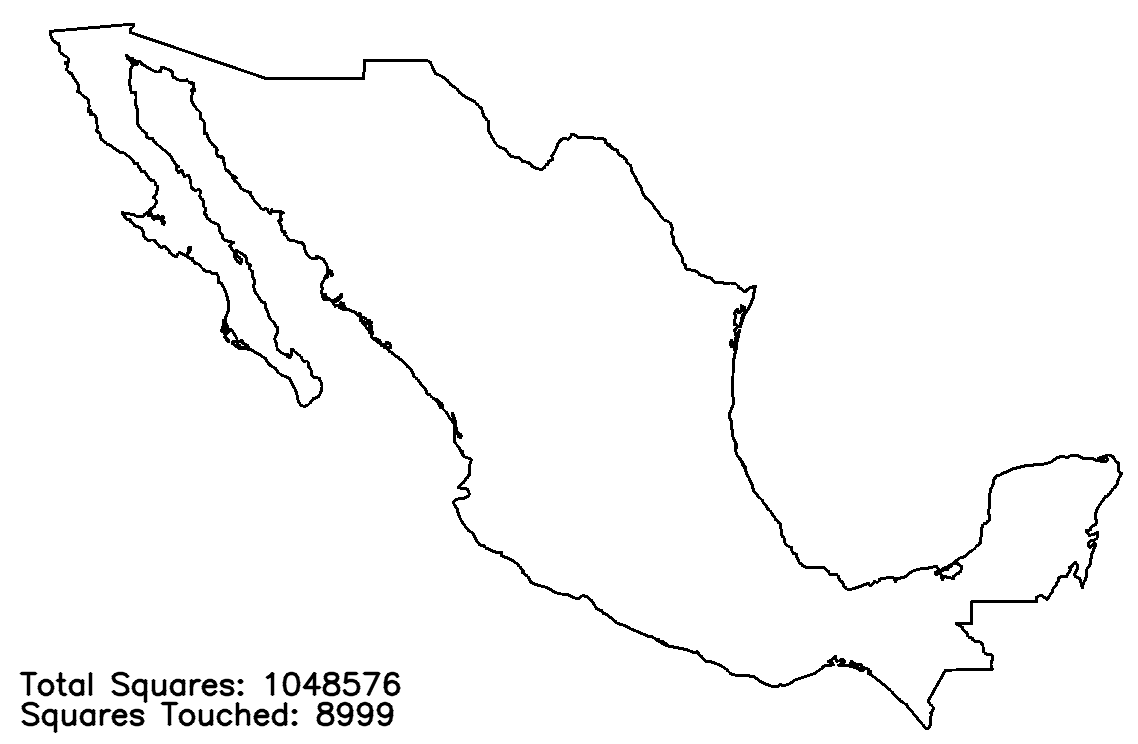

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import math
import uuid
import urllib.request

EXPONENTE = 2
LIMITE = 1200
URL_IMAGE = 'https://raw.githubusercontent.com/USHIERU/Minkowski-Bouligand-dimension/f2c4784593220a2139dc38f4cf9882370eb5b4b9/resources/mexico.png'
WITH_GRID = False
NAME = "mexico"


def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

if __name__ == "__main__":
    img = url_to_image(URL_IMAGE)

    minkowskiBouligandDimension = MinkowskiBouligandDimension(img)
    height, width, _ = img.shape
    
    i = 1

    print('Imagen Original\n------------------------------')
    cv2_imshow(img)
    while(EXPONENTE < LIMITE):
        total_box_touched = EXPONENTE ** 2
        boxesTouched, newImage = minkowskiBouligandDimension.get_data(EXPONENTE, height, width, WITH_GRID)
        EXPONENTE *= 2
        i += 1
        print("img: %s\nTotal boxes: %s\nBoxes Touched: %s\nlog(N): %s\nlog(x): %s\n------------------------------" % ("%s %s" % (NAME, i), total_box_touched, boxesTouched, math.log(boxesTouched),  math.log(total_box_touched)))
        cv2_imshow(newImage)
